### Import Data

In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [97]:
df = pd.read_csv("D:/PROJECTS/LOAN APPROVE PREDICTION/DATA/data.csv")

In [98]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [99]:
df.shape

(614, 13)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [101]:
df['Dependents'].unique()
df['Credit_History'].unique()
df['Gender'].unique()
df['Property_Area'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

array([ 1.,  0., nan])

array(['Male', 'Female', nan], dtype=object)

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [102]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [104]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [105]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [106]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [108]:
df['Dependents'] = df['Dependents'].replace(to_replace='3+', value='4')

In [109]:
df['Loan Term yr'] = df['Loan_Amount_Term']/12

## Data Visualization

- Categorical Visualization

[Text(0, 0, '1'), Text(0, 0, '')]

[Text(0, 0, '1'), Text(0, 0, '1')]

[Text(0, 0, '1'), Text(0, 0, '1')]

[Text(0, 0, '4'), Text(0, 0, '')]

[Text(0, 0, '2'), Text(0, 0, '1')]

[Text(0, 0, '28'), Text(0, 0, '16')]

[Text(0, 0, '3'), Text(0, 0, '1')]

[Text(0, 0, '10'), Text(0, 0, '3')]

[Text(0, 0, '8'), Text(0, 0, '6')]

[Text(0, 0, '411'), Text(0, 0, '101')]

[Text(0, 0, '11'), Text(0, 0, '4')]

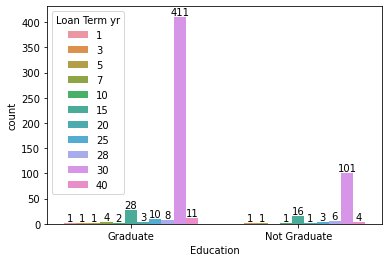

In [110]:
ax = sns.countplot(x = df['Education'], hue = df['Loan Term yr'].astype(int))
for i in ax.containers:
    ax.bar_label(i, )

In [111]:
col = ['Loan Term yr','Gender', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status']

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '44'),
 Text(0, 0, '4'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '512'),
 Text(0, 0, '15')]

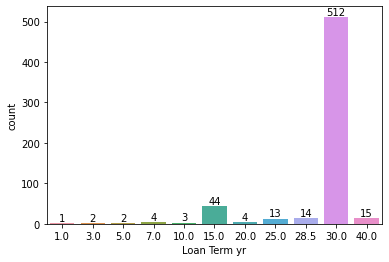

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '502'), Text(0, 0, '112')]

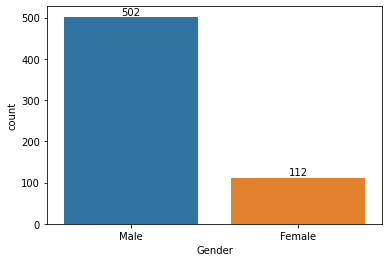

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '360'), Text(0, 0, '102'), Text(0, 0, '101'), Text(0, 0, '51')]

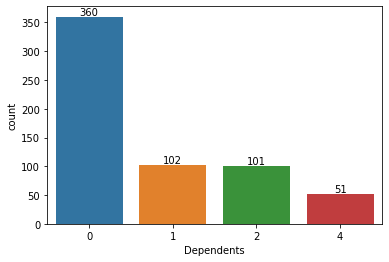

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '480'), Text(0, 0, '134')]

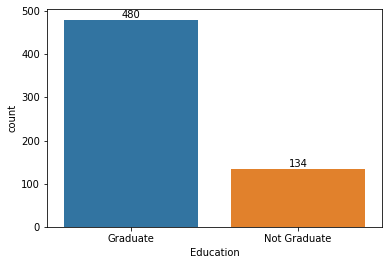

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '532'), Text(0, 0, '82')]

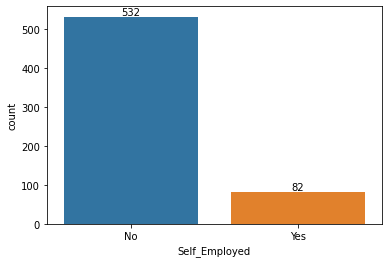

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '202'), Text(0, 0, '179'), Text(0, 0, '233')]

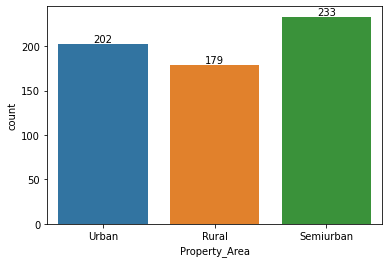

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '422'), Text(0, 0, '192')]

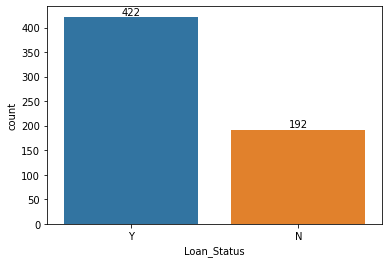

In [112]:
for i in col:
    ax = sns.countplot(df[i])
    for j in ax.containers:
        ax.bar_label(j, )
        plt.show()

<Axes: xlabel='Property_Area', ylabel='Loan Term yr'>

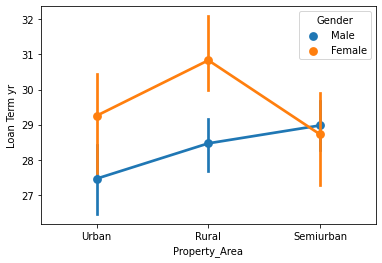

In [115]:
sns.pointplot(x = 'Property_Area', y = 'Loan Term yr', hue = 'Gender', data=df)

- Numerical Visualization

In [44]:
n_cols = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

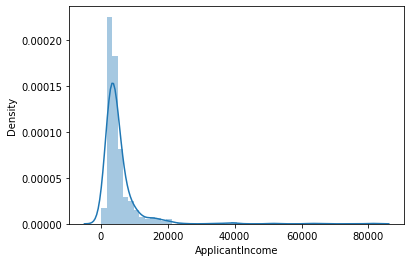

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

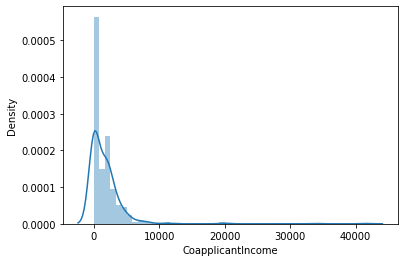

C:\Users\Mitul\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='LoanAmount', ylabel='Density'>

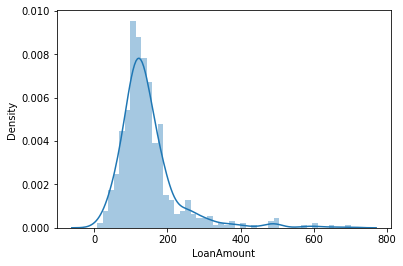

In [45]:
for i in n_cols:
    sns.distplot(df[i])
    plt.show()

<Figure size 720x432 with 0 Axes>

C:\Users\Mitul\AppData\Local\Temp/ipykernel_9784/2373733774.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(columns=['Loan Term yr']).corr(), annot=True, cmap='BuPu')


<Axes: >

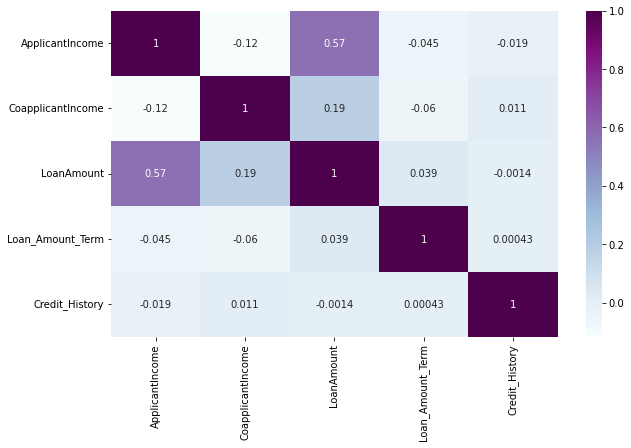

In [46]:
plt.figure(figsize = (10,6))
sns.heatmap(df.drop(columns=['Loan Term yr']).corr(), annot=True, cmap='BuPu')

In [47]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0}).astype('int')
df['Married'] = df['Married'].map({'Yes':1, 'No':0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0}).astype(int)
df['Property_Area'] = df['Property_Area'].map({"Rural":0, 'Urban':1, 'Semiurban':2}).astype(int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1})

In [48]:
X = df.drop(columns=['Loan_ID', 'Loan Term yr', 'Loan_Status'])

In [49]:
y = df['Loan_Status']

#### Feature Scalling

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan Term yr
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,30.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,30.0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,30.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,30.0
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,30.0


In [51]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [52]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [53]:
X[cols] = st.fit_transform(X[cols])

X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,0.000000,0.279851,1.0,1
1,1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.279851,1.0,0


#### Splitting data

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [56]:
model_df = {}
def model_(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test, y_pred)}")
    
    val_score = cross_val_score(model, X, y, cv = 5)
    print(f"{model} Avg cross val score is {np.mean(val_score)}")
    
    model_df[model] = round(np.mean(val_score)*100,2)

 ### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_(model, X, y)

LogisticRegression() accuracy is 0.7886178861788617
LogisticRegression() Avg cross val score is 0.8061975209916034


### SVC

In [58]:
from sklearn import svm
model = svm.SVC()
model_(model, X, y)

SVC() accuracy is 0.7804878048780488
SVC() Avg cross val score is 0.8013061442089832


### Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_(model, X, y)

DecisionTreeClassifier() accuracy is 0.6991869918699187
DecisionTreeClassifier() Avg cross val score is 0.7150206584033054


### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_(model, X, y)

RandomForestClassifier() accuracy is 0.7804878048780488
RandomForestClassifier() Avg cross val score is 0.7882980141276821


### Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_(model, X, y)

GradientBoostingClassifier() accuracy is 0.7642276422764228
GradientBoostingClassifier() Avg cross val score is 0.7817672930827669


In [62]:
model_df

{LogisticRegression(): 80.62,
 SVC(): 80.13,
 DecisionTreeClassifier(): 71.5,
 RandomForestClassifier(): 78.83,
 GradientBoostingClassifier(): 78.18}

#### Hyperparameter Tunning

In [63]:
from sklearn.model_selection import RandomizedSearchCV

###### 1) Logistic Regression

In [64]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}

In [65]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions = log_reg_grid, n_iter=20, cv=5, verbose=True)

In [66]:
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [67]:
rs_log_reg.best_score_

0.8145949288806431

In [68]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

###### 2) SVC

In [69]:
svc_grid = {'C':[0.25, 0.50, 0.75, 1], 'kernel':["linear"]}

In [70]:
rs_svc = RandomizedSearchCV(svm.SVC(), param_distributions=svc_grid, cv = 5, verbose=True)

In [71]:
rs_svc.fit(X_train, y_train)

C:\Users\Mitul\anaconda4\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [72]:
rs_svc.best_score_

0.8145949288806431

In [73]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

###### 3) Random Forest Classifier

In [74]:
rf_grid = {"n_estimators": np.arange(10,1000,10),
           'max_features':['auto', 'sqrt'],
           'max_depth':[None, 3, 5, 10, 20, 30],
            'min_samples_split':[2,5,20,50,100],
          'min_samples_leaf':[1,2,5,10]}

In [75]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv = 5, n_iter=20, verbose=True)

In [76]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Mitul\anaconda4\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mitul\anaconda4\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mitul\anaconda4\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Mitul\anaconda4\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Mitul\anaconda4\lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [77]:
rs_rf.best_score_

0.8145949288806431

In [78]:
rs_rf.best_params_

{'n_estimators': 990,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 5}

In [79]:
tunned_result = {"Logistic Regression()":round(rs_log_reg.best_score_*100,2),
                "SVC()":round(rs_svc.best_score_*100,2),
                "RandomForestClassifier()":round(rs_rf.best_score_*100,2)}

In [80]:
tunned_result

{'Logistic Regression()': 81.46,
 'SVC()': 81.46,
 'RandomForestClassifier()': 81.46}

In [81]:
print("before tunning: ", model_df)
print("\nafter tunning: ",tunned_result)

before tunning:  {LogisticRegression(): 80.62, SVC(): 80.13, DecisionTreeClassifier(): 71.5, RandomForestClassifier(): 78.83, GradientBoostingClassifier(): 78.18}

after tunning:  {'Logistic Regression()': 81.46, 'SVC()': 81.46, 'RandomForestClassifier()': 81.46}


##### Save the Model

In [82]:
X = df.drop(columns=['Loan_ID', 'Loan Term yr', 'Loan_Status'])
y = df['Loan_Status']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [84]:
rf = RandomForestClassifier(n_estimators = 320,
                             min_samples_split = 50,
                             min_samples_leaf = 10,
                             max_features = 'sqrt',
                             max_depth = 10)

In [85]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=50,
                       n_estimators=320)

In [86]:
import joblib

In [87]:
joblib.dump(rf, 'loan_status_predict')

['loan_status_predict']

In [88]:
saved_model = joblib.load('loan_status_predict')

- Save EDA Process

In [89]:
import pandas as pd
df  = pd.read_csv("D:/PROJECTS/LOAN APPROVE PREDICTION/DATA/data.csv")

def fun(df):
    
    df  = df .drop(columns=['Loan_ID'])

    df  ['Gender'] = df  ['Gender'].fillna(df  ['Gender'].mode()[0])

    df  ['Married'] = df  ['Married'].fillna(df  ['Married'].mode()[0])

    df  ['Dependents'] = df  ['Dependents'].fillna(df  ['Dependents'].mode()[0])

    df  ['Self_Employed'] = df  ['Self_Employed'].fillna(df  ['Self_Employed'].mode()[0])

    df  ['Credit_History'] = df  ['Credit_History'].fillna(df  ['Credit_History'].mode()[0])

    df  ['LoanAmount'] = df  ['LoanAmount'].fillna(df  ['LoanAmount'].mean())

    df  ['Loan_Amount_Term'] = df  ['Loan_Amount_Term'].fillna(df  ['Loan_Amount_Term'].mean())

    df  ['Gender'] = df  ['Gender'].map({'Male':1, 'Female':0}).astype('int')
    df  ['Married'] = df  ['Married'].map({'Yes':1, 'No':0}).astype('int')
    df  ['Education'] = df  ['Education'].map({'Graduate':1, 'Not Graduate':0}).astype('int')
    df  ['Self_Employed'] = df  ['Self_Employed'].map({'Yes':1, 'No':0}).astype(int)
    df  ['Property_Area'] = df  ['Property_Area'].map({"Rural":0, 'Urban':1, 'Semiurban':2}).astype(int)

    df ['Dependents'] = df ['Dependents'].replace(to_replace='3+', value='4')
    return df

- If we want predict with some data

In [90]:
import pandas as pd
df_test  = pd.read_csv("D:/PROJECTS/LOAN APPROVE PREDICTION/DATA/test.csv")

In [91]:
Testing_Data = fun(df_test)

import joblib
result = joblib.load('loan_status_predict').predict(Testing_Data)

In [92]:
df_tested = pd.DataFrame(result, columns=['Loan_Status'])

df_tested = pd.merge(df_test, df_tested, left_index=True, right_index=True)

In [93]:
df_tested.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


## GUI

In [77]:
from tkinter import *
import joblib
import pandas as pd

In [78]:
master = Tk()
master.title("Loan Status Prediction Using Machine Learning")

label = Label(master, text = "Loan Status Prediction", bg = 'black', fg = 'white').grid(row = 0, columnspan = 2)

Label(master, text = "Gender [1:Male, 0:Female]").grid(row = 1)
Label(master, text = "Married [1:Yes, 0:No]").grid(row = 2)
Label(master, text = "Departments [1, 2, 3, 4]").grid(row = 3)
Label(master, text = "Education").grid(row = 4)
Label(master, text = "Self_Employed").grid(row = 5)
Label(master, text = "ApplicantIncome").grid(row = 6)
Label(master, text = "CoapplicantIncome").grid(row = 7)
Label(master, text = "LoanAmount").grid(row = 8)
Label(master, text = "Loan_Amount_Term").grid(row = 9)
Label(master, text = "Credit_History").grid(row = 10)
Label(master, text = "Property_Area").grid(row = 11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row = 1, column = 1)
e2.grid(row = 2, column = 1)
e3.grid(row = 3, column = 1)
e4.grid(row = 4, column = 1)
e5.grid(row = 5, column = 1)
e6.grid(row = 6, column = 1)
e7.grid(row = 7, column = 1)
e8.grid(row = 8, column = 1)
e9.grid(row = 9, column = 1)
e10.grid(row = 10, column = 1)
e11.grid(row = 11, column = 1)

''

In [79]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())    
    p4 = float(e4.get())    
    p5 = float(e5.get())    
    p6 = float(e6.get())    
    p7 = float(e7.get()) 
    p8 = float(e8.get())    
    p9 = float(e9.get())    
    p10 = float(e10.get())    
    p11 = float(e11.get())
    
    saved_model = joblib.load('loan_status_predict')
    df = pd.DataFrame(
    {
      'Gender':p1, 'Married':p2, 'Dependents':p3, 'Education':p4, 'Self_Employed':p5,
       'ApplicantIncome':p6, 'CoapplicantIncome':p7, 'LoanAmount':p8,
       'Loan_Amount_Term':p9, 'Credit_History':p10, 'Property_Area':p11  
    }, index=[0])
    result = saved_model.predict(df)
    
    if result == 1:
        Label(master, text = 'Loan Approved').grid(row = 31)
    else:
        Label(master, text = 'Loan Not Approved').grid(row = 31)

In [80]:
Button(master, text = 'Predict', command = show_entry).grid()
mainloop()